<a href="https://colab.research.google.com/github/alexandrufalk/tensorflow/blob/Master/01_Neural_Network_Regression_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Regression with TensorFlow

To simplfy regresion-> predincting a number
efinitions for a regression problem (https://en.wikipedia.org/wiki/Regression_analysis)

# Typical architecture of a regresison neural network

 -the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputting some kind of target number.

**Hyperparameter -	Typical value**

Input layer shape -	Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction)

Hidden layer(s) -	Problem specific, minimum = 1, maximum = unlimited

Neurons per hidden layer -	Problem specific, generally 10 to 100

Output layer shape -	Same shape as desired prediction shape (e.g. 1 for house price)

Hidden activation -	Usually ReLU (rectified linear unit)

Output activation -	None, ReLU, logistic/tanh

Loss function -	MSE (mean square error) or MAE (mean absolute error)/Huber (combination of MAE/MSE) if outliers

Optimizer -	SGD (stochastic gradient descent), Adam

Table 1: Typical architecture of a regression network. Source: Adapted from page 293 of Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron


🔑 Note: A hyperparameter in machine learning is something a data analyst or developer can set themselves, where as a parameter usually describes something a model learns on its own (a value not explicitly set by an analyst).

In [3]:
import tensorflow as tf
print(tf.__version__)

2.15.0


# Creating data to view and fit

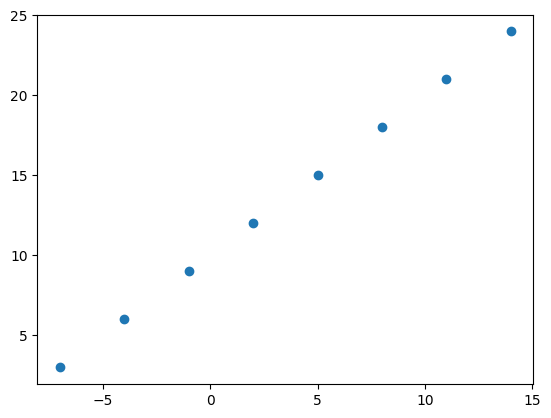

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [5]:
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [6]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

((), ())

In [ ]:

#  look at the single examples invidually
X[0], y[0]

(-7.0, 3.0)

In [7]:
# Turn numpy arrays into tensors
X=tf.constant(X)
y=tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

# Steps in modelling with TensorFlow

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

**1.Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).

**2/Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

**3.Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

In [9]:
#Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error. Computes the mean of absolute difference between labels and predictions.
              optimizer=tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descendent)
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 16.3462 - mae: 16.3462
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 16.0649 - mae: 16.0649
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 15.7837 - mae: 15.7837
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 15.5024 - mae: 15.5024
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 15.2212 - mae: 15.2212


In [ ]:

# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 210ms/step


array([[-5.7405353]], dtype=float32)

# Improving a model

To improve our model, we alter almost every part of the 3 steps we went through before.

**Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
**Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
**Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Rebuild the model

# 1. Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model -will be trained longer
model.fit(tf.expand_dims(X,axis=1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 705ms/step - loss: 19.6777 - mae: 19.6777
Epoch 2/100
1/1 [==============================] - 0s 25ms/step - loss: 19.3965 - mae: 19.3965
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 19.1152 - mae: 19.1152
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 18.8340 - mae: 18.8340
Epoch 5/100
1/1 [==============================] - 0s 37ms/step - loss: 18.5527 - mae: 18.5527
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 18.2715 - mae: 18.2715
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 17.9902 - mae: 17.9902
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 17.7090 - mae: 17.7090
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 17.4277 - mae: 17.4277
Epoch 10/100
1/1 [==============================] - 0s 36ms/step - loss: 17.1465 - mae: 17.1465
Epoch 11/100
1/1 [==============================

In [ ]:
# Make a prediction with the model

model.predict([17.0])

1/1 [==============================] - 0s 125ms/step


array([[29.634918]], dtype=float32)

In [ ]:
# Rebuild the model

# 1. Create the model
model=tf.keras.Sequential([tf.keras.layers.Dense(100,activation='relu'),
                           tf.keras.layers.Dense(1)])

#2. Compile

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.5893 - mae: 14.5893
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 14.0562 - mae: 14.0562
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 13.5346 - mae: 13.5346
Epoch 4/100
1/1 [==============================] - 0s 37ms/step - loss: 13.0182 - mae: 13.0182
Epoch 5/100
1/1 [==============================] - 0s 30ms/step - loss: 12.5056 - mae: 12.5056
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 11.9965 - mae: 11.9965
Epoch 7/100
1/1 [==============================] - 0s 40ms/step - loss: 11.4842 - mae: 11.4842
Epoch 8/100
1/1 [==============================] - 0s 45ms/step - loss: 10.9581 - mae: 10.9581
Epoch 9/100
1/1 [==============================] - 0s 42ms/step - loss: 10.4184 - mae: 10.4184
Epoch 10/100
1/1 [==============================] - 0s 33ms/step - loss: 9.8681 - mae: 9.8681
Epoch 11/100
1/1 [==============================] - 0

In [ ]:
# Make a prediction with the model

model.predict([17.0])

1/1 [==============================] - 0s 130ms/step


array([[31.313456]], dtype=float32)

In [ ]:
# Rebuild the model

# 1. Create the model
model=tf.keras.Sequential([tf.keras.layers.Dense(100,activation='relu'),
                           tf.keras.layers.Dense(100,activation='relu'),
                           tf.keras.layers.Dense(100,activation='relu'),
                           tf.keras.layers.Dense(1)])

# 2. compile

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.5136 - mae: 13.5136
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 13.2165 - mae: 13.2165
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 12.9442 - mae: 12.9442
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 12.6919 - mae: 12.6919
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 12.4552 - mae: 12.4552
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 12.2206 - mae: 12.2206
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 11.9783 - mae: 11.9783
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 11.7328 - mae: 11.7328
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 11.4993 - mae: 11.4993
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 11.3079 - mae: 11.3079
Epoch 11/100
1/1 [==============================] -

In [ ]:
# Make a prediction with the model

model.predict([17.0])

1/1 [==============================] - 0s 88ms/step


array([[31.480474]], dtype=float32)

In [ ]:
# Rebuild the model

# 1. Create the model
model=tf.keras.Sequential([tf.keras.layers.Dense(100,activation='relu'),

                           tf.keras.layers.Dense(1)])

# 2. compile

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 607ms/step - loss: 13.5654 - mae: 13.5654
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.5570 - mae: 13.5570
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 13.5486 - mae: 13.5486
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 13.5402 - mae: 13.5402
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 13.5319 - mae: 13.5319
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 13.5235 - mae: 13.5235
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 13.5151 - mae: 13.5151
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 13.5067 - mae: 13.5067
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 13.4983 - mae: 13.4983
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 13.4899 - mae: 13.4899
Epoch 11/100
1/1 [==============================

In [ ]:
model.predict([17])

1/1 [==============================] - 0s 85ms/step


array([[2.6758552]], dtype=float32)

In [ ]:

# Rebuild the model

# 1. Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 431ms/step - loss: 14.0618 - mae: 14.0618
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 14.0613 - mae: 14.0613
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 14.0609 - mae: 14.0609
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 14.0604 - mae: 14.0604
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 14.0600 - mae: 14.0600
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 14.0595 - mae: 14.0595
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 14.0591 - mae: 14.0591
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 14.0586 - mae: 14.0586
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 14.0582 - mae: 14.0582
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 14.0577 - mae: 14.0577
Epoch 11/100
1/1 [==============================

In [ ]:
model.predict([17])

1/1 [==============================] - 0s 105ms/step


array([[-2.5487006]], dtype=float32)

In [ ]:
# Rebuild the model

# 1. Create the model
model=tf.keras.Sequential([tf.keras.layers.Dense(50,activation=None),
                           tf.keras.layers.Dense(1)])

#2 Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

#3 Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 889ms/step - loss: 12.4995 - mae: 12.4995
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 11.8170 - mae: 11.8170
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 11.1330 - mae: 11.1330
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 10.4435 - mae: 10.4435
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 9.7457 - mae: 9.7457
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 9.0362 - mae: 9.0362
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 8.3120 - mae: 8.3120
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 7.5700 - mae: 7.5700
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8873 - mae: 6.8873
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8627 - mae: 6.8627
Epoch 11/100
1/1 [==============================] - 0s 18ms/

In [ ]:
model.predict([17])

1/1 [==============================] - 0s 94ms/step


array([[26.92579]], dtype=float32)

# Evaluating a model

A typical workflow you'll go through when building neural networks is:

Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...

It's a good idea to visualize:

The data - what data are you working with? What does it look like?
The model itself - what does the architecture look like? What are the different shapes?
The training of a model - how does a model perform while it learns?
The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

In [10]:
# Make a bigger dataset

X=np.arange(-100,100,4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [11]:
# create labels

y=X+10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

# Visualizing the data

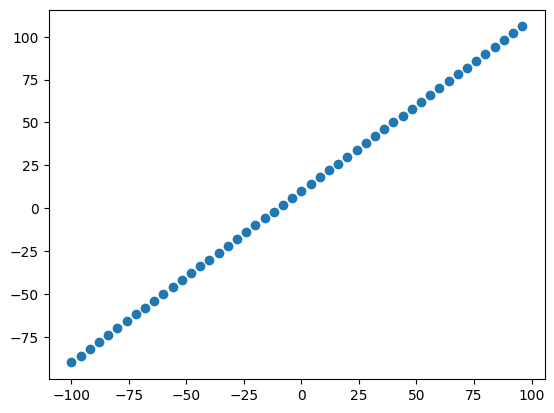

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

# Split data into training/test set

**Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).

**Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).

**Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).




In [13]:
# Spliting the data
X_train=X[:40]
y_train=y[:40]

X_test=y[40:]
y_test=y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

# Visualising the training and test data

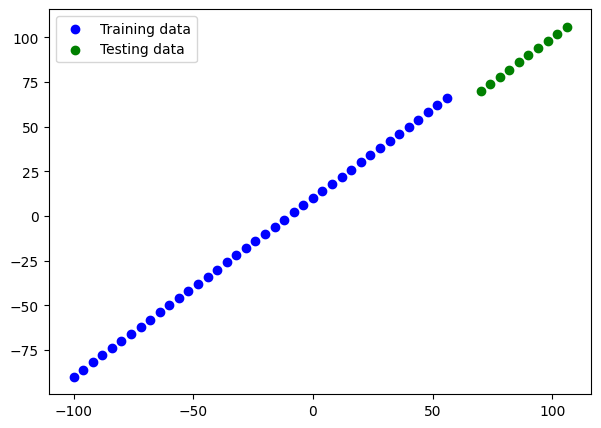

In [17]:
plt.figure(figsize=(7,5))
#Plot taining data
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show a legend
plt.legend()



In [ ]:
# Build a model

#Set random seed
tf.random.set_seed(42)

#Create a model

model=tf.keras.Sequential([tf.keras.layers.Dense(1)])

#Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#fit the model
#model.fit(X_train,y_train,epochs=100) # commented out on purpose

In [ ]:
# Doesn't work (model not fit/built)
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

the cell above errors because we haven't fit or built our modeland also haven't told it what input shape it should be expecting.

In [18]:
#Create a model with input_shape

#Set random seed
tf.random.set_seed(42)

#Create the model

model=tf.keras.Sequential([tf.keras.layers.Dense(10,input_shape=[1], name="input_layer"),
                           tf.keras.layers.Dense(1,name="output_layer")], name="model_1") #Define the input shape

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])


In [19]:
#Model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Total params** - total number of parameters in the model.

**Trainable parameters** - these are the parameters (patterns) the model can update as it trains.

**Non-trainable parameters -** these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [20]:
#Fit the model to the training data
model.fit(X_train,y_train,epochs=100, verbose=0)

By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

verbose=0 will show you nothing (silent)

verbose=1 will show you an animated progress bar like this:

progres_bar

verbose=2 will just mention the number of epoch like this:

enter image description here

In [21]:
# Check the model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 2D plot of the model using plot_model()

In [22]:
from tensorflow.keras.utils import plot_model


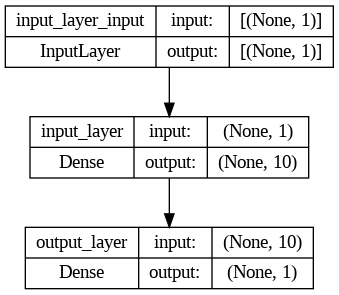

In [23]:
plot_model(model,show_shapes=True)

# Visualizing the predictions

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test vs. y_pred (ground truth vs. predictions).

First, we'll make some predictions on the test data (X_test), remember the model has never seen the test data.



In [24]:
# Make prediction
y_preds=model.predict(X_test)

1/1 [==============================] - 0s 296ms/step


In [22]:
#View the predictions
y_preds

array([[62.511547],
       [66.05095 ],
       [69.59034 ],
       [73.12974 ],
       [76.66913 ],
       [80.20853 ],
       [83.747925],
       [87.28733 ],
       [90.82671 ],
       [94.36611 ]], dtype=float32)

In [35]:
# ploting function to visualize the predictions

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data,train_labels,c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  #Plot the predictions in red
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  # Shoe the Legend
  plt.legend();

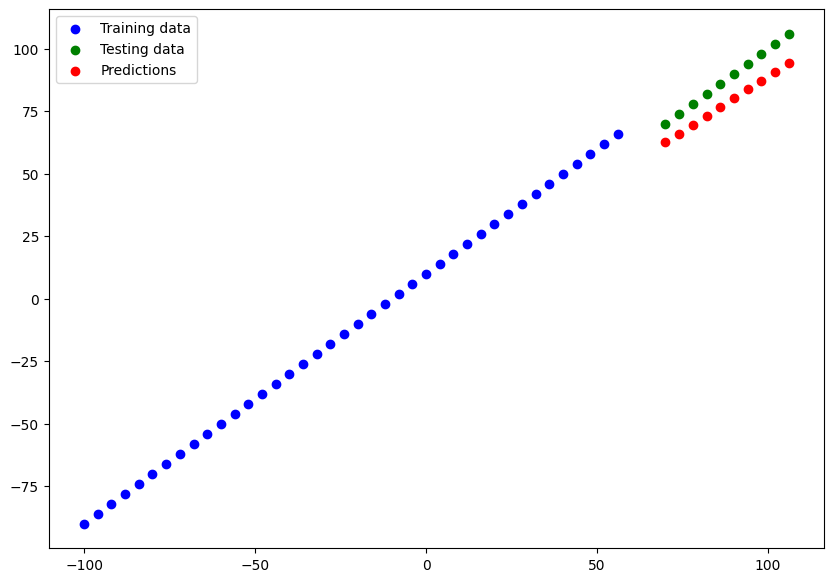

In [24]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

# Evaluating predictions
Two of the main metrics used for regression problems are:

Mean absolute error (MAE) - the mean difference between each of the predictions.
Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).
The lower each of these values, the better.

You can also use model.evaluate() which will return the loss of the model as well as any metrics setup during the compile step.

In [25]:
# Evaluate the model on the test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 150ms/step - loss: 9.5612 - mae: 9.5612


[9.561171531677246, 9.561171531677246]

In [26]:
# Calculate the mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=y_test,y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([25.488453 , 21.94905  , 18.40966  , 15.49621  , 13.198523 ,
       11.516589 , 10.450415 , 10.       , 10.165342 , 10.9464445],
      dtype=float32)>

In [27]:
# Check the test label tensor values
y_test


array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [27]:

# Check the predictions tensor values (notice the extra square brackets)
y_preds


array([[61.831905],
       [65.34927 ],
       [68.866646],
       [72.384026],
       [75.901405],
       [79.418785],
       [82.936165],
       [86.453545],
       [89.97091 ],
       [93.4883  ]], dtype=float32)

In [28]:

# Check the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

In [29]:


# Shape after squeeze()
y_preds.squeeze().shape



(10,)

In [30]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.339904>

In [31]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=108.83525>

In [32]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

# Runing experiments to improve our model

here are many different ways you can do this, but 3 of the main ones are:

**Get more data** - get more examples for your model to train on (more opportunities to learn patterns).

**Make your model larger** (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.

**Train for longer** - give your model more of a chance to find the patterns in the data.

build 3 models and compare their results:

model_1 - same as original model, 1 layer, trained for 100 epochs.
model_2 - 2 layers, trained for 100 epochs.
model_3 - 2 layers, trained for 500 epochs.

In [46]:
# Model 1
#Set random seed
tf.random.set_seed(42)

#1 Crete the model

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#Compile the model

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
#Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 107.6593 - mae: 107.6593
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 72.2038 - mae: 72.2038
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 34.6648 - mae: 34.6648
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2520 - mae: 9.2520
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1070 - mae: 10.1070
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.3820 - mae: 9.3820
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.5346 - mae: 8.5346
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0731 - mae: 9.0731
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.5995 - mae: 18.5995
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.0534 - mae: 10.0534
Epoch 11/100
2/2 [==============================] - 0s 9ms/step 

1/1 [==============================] - 0s 76ms/step


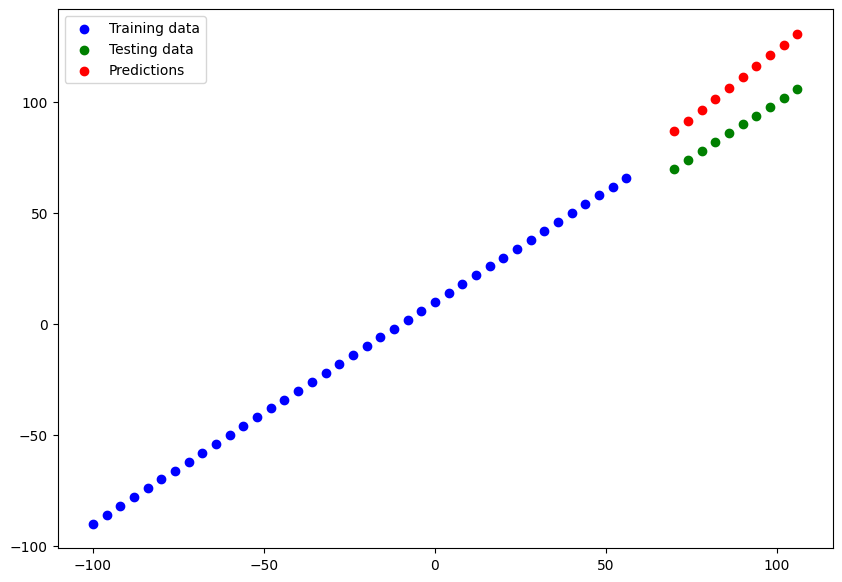

In [47]:
# Make and plot predictions for model_1
y_preds_1=model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [48]:
# Calculate model_1 metrics
mae_1=mae(y_test,y_preds_1.squeeze()).numpy()
mse_1=mse(y_test,y_preds_1.squeeze()).numpy()
mae_1,mse_1

(20.851658, 441.33292)

In [49]:
#Model 2

#1. Create the model

model_2=tf.keras.Sequential([tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)])

#2 Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mae'])
#3 Fit the model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 276ms/step


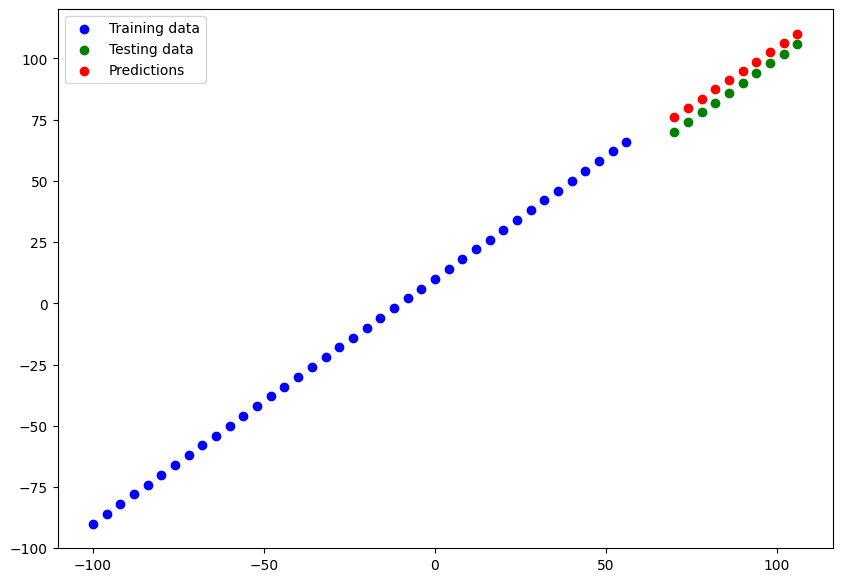

In [50]:
# Make and plot predictions for model_2
y_preds_2=model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [51]:
# Calculate model_2 metrics
mae_2=mae(y_test,y_preds_2.squeeze()).numpy()
mse_2=mse(y_test,y_preds_2.squeeze()).numpy()
mae_2, mse_2

(5.0570974, 25.978611)

In [52]:
# Build model 3

#1 Create the model

model_3=tf.keras.Sequential([tf.keras.layers.Dense(1),
                             tf.keras.layers.Dense(1)])

#2 Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mae'])
#3 Fit the model
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500, verbose=0)

1/1 [==============================] - 0s 93ms/step


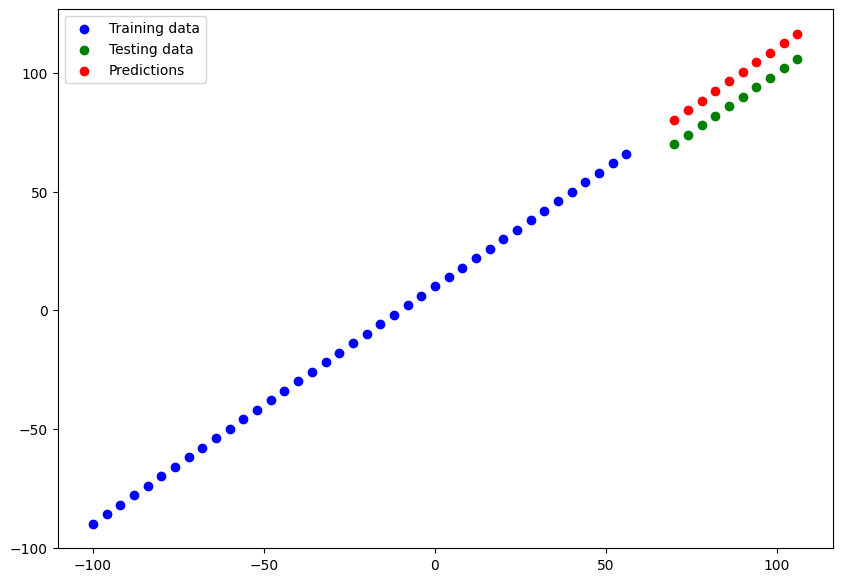

In [53]:
# MAke and plot predictions for model_3
y_preds_3=model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [54]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(10.412534, 108.423706)

# Comparing results

In [55]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

In [56]:
import pandas as pd
all_results=pd.DataFrame(model_results,columns=["model","mae",'mse'])
all_results


,model,mae,mse
0,model_1,20.851658,441.332916
1,model_2,5.057097,25.978611
2,model_3,10.412534,108.423706


🔑 Note: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

# Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

sing tools such as:

TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
Weights & Biases - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

# Saving a model

save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

1.The SavedModel format (default).

2.The HDF5 format.

In [57]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

In [58]:

# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [59]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:

# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


# Loading a model

In [61]:
# Load a model from the SavedModel format
load_saved_model=tf.keras.models.load_model("best_model_SavedModel_format")
load_saved_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1]:
# Compare model_2 with the SavedModel version

In [63]:
saved_model_preds=load_saved_model.predict(X_test)
mae(y_test,saved_model_preds.squeeze()).numpy()==mae(y_test,y_preds_2.squeeze()).numpy()

1/1 [==============================] - 1s 571ms/step


True

In [64]:
#Load the model from HDF5 format
load_h5_model=tf.keras.models.load_model("best_model_HDF5_format.h5")
load_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
# Compare model_2 with the loaded HDF5 version
h5_model_preds=load_h5_model.predict(X_test)
mae(y_test,h5_model_preds.squeeze()).numpy()==mae(y_test,y_preds_2.squeeze()).numpy()

1/1 [==============================] - 0s 99ms/step


True